[View in Colaboratory](https://colab.research.google.com/github/stanimman/Simple/blob/master/Titanic_Embedding.ipynb)

In [1]:
!apt-get install  -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
Please enter the verification code: Access token retrieved correctly.


In [1]:
!mkdir data
!cd data
!pip install kaggle-cli
!kg download -u 'stanimman' -p '***' -c 'titanic'

    100% |████████████████████████████████| 81kB 4.1MB/s 
    100% |████████████████████████████████| 5.3MB 6.7MB/s 
    100% |████████████████████████████████| 102kB 22.6MB/s 
    100% |████████████████████████████████| 71kB 20.1MB/s 
  Running setup.py bdist_wheel for kaggle-cli ... - done
  Stored in directory: /content/.cache/pip/wheels/d5/bb/10/c1dd1b08c7433c943cb55c46367ae3f891415e8a37300ff8a7
  Running setup.py bdist_wheel for cliff ... - \ done
  Stored in directory: /content/.cache/pip/wheels/50/00/6d/d4aeb5ccdd47dd76800592b26f943e4959bc705b2d4e6e54e1
  Running setup.py bdist_wheel for configparser ... -

 done
  Stored in directory: /content/.cache/pip/wheels/a3/61/79/424ef897a2f3b14684a7de5d89e8600b460b89663e6ce9d17c
  Running setup.py bdist_wheel for PrettyTable ... - done
  Stored in directory: /content/.cache/pip/wheels/80/34/1c/3967380d9676d162cb59513bd9dc862d0584e045a162095606
  Running setup.py bdist_wheel for pyperclip ... - done
  Stored in directory: /content/.cache/pip/wheels/58/32/92/2227fba72f0702e4168f084c6dfc2d6d3fd1904634ab61ca6a
Successfully built kaggle-cli cliff configparser PrettyTable pyperclip
downloading https://www.kaggle.com/c/titanic/download/train.csv

train.csv 100% |####################################| Time: 0:00:00 184.8 KiB/s

downloading https://www.kaggle.com/c/titanic/download/test.csv

test.csv 100% |#####################################| Time: 0:00:00  74.8 KiB/s

downloading https://www.kaggle.com/c/titanic/download/gender_submission.csv

gender_submission.csv 100% |########################| Time: 0:00:00  10.1 KiB/s



In [0]:
! apt install unzip


Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-21ubuntu1).
0 upgraded, 0 newly installed, 0 to remove and 12 not upgraded.
Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  application_test.csv.zip
  inflating: application_test.csv    


In [0]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

In [0]:
!unzip application_train.csv.zip
!unzip application_test.csv.zip

Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  application_test.csv.zip
  inflating: application_test.csv    


In [2]:
!ls

data  datalab  gender_submission.csv  test.csv	train.csv


In [0]:
titanic_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')

In [0]:
# drop unnecessary columns, these columns won't be useful in analysis and prediction
titanic_df = titanic_df.drop(['PassengerId','Name','Ticket'], axis=1)
test_df    = test_df.drop(['Name','Ticket'], axis=1)

In [0]:
# only in titanic_df, fill the two missing values with the most occurred value, which is "S".
titanic_df["Embarked"] = titanic_df["Embarked"].fillna("S")

In [0]:
# Fare

# only for test_df, since there is a missing "Fare" values
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

# convert from float to int
titanic_df['Fare'] = titanic_df['Fare'].astype(int)
test_df['Fare']    = test_df['Fare'].astype(int)

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


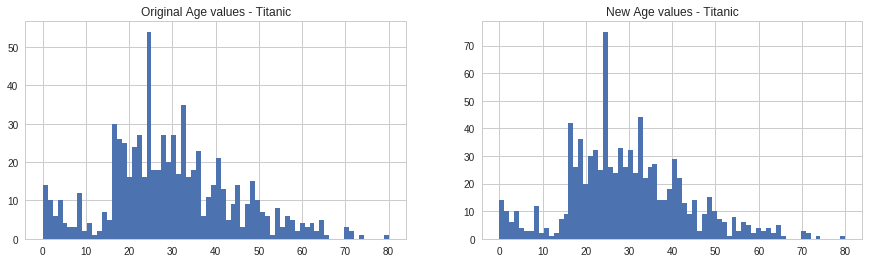

In [10]:
# Age 

fig, (axis1,axis2) = plt.subplots(1,2,figsize=(15,4))
axis1.set_title('Original Age values - Titanic')
axis2.set_title('New Age values - Titanic')

# axis3.set_title('Original Age values - Test')
# axis4.set_title('New Age values - Test')

# get average, std, and number of NaN values in titanic_df
average_age_titanic   = titanic_df["Age"].mean()
std_age_titanic       = titanic_df["Age"].std()
count_nan_age_titanic = titanic_df["Age"].isnull().sum()

# get average, std, and number of NaN values in test_df
average_age_test   = test_df["Age"].mean()
std_age_test       = test_df["Age"].std()
count_nan_age_test = test_df["Age"].isnull().sum()

# generate random numbers between (mean - std) & (mean + std)
rand_1 = np.random.randint(average_age_titanic - std_age_titanic, average_age_titanic + std_age_titanic, size = count_nan_age_titanic)
rand_2 = np.random.randint(average_age_test - std_age_test, average_age_test + std_age_test, size = count_nan_age_test)

# plot original Age values
# NOTE: drop all null values, and convert to int
titanic_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)
# test_df['Age'].dropna().astype(int).hist(bins=70, ax=axis1)

# fill NaN values in Age column with random values generated
titanic_df["Age"][np.isnan(titanic_df["Age"])] = rand_1
test_df["Age"][np.isnan(test_df["Age"])] = rand_2

# convert from float to int
titanic_df['Age'] = titanic_df['Age'].astype(int)
test_df['Age']    = test_df['Age'].astype(int)
        
# plot new Age Values
titanic_df['Age'].hist(bins=70, ax=axis2)

In [0]:
# Cabin
# It has a lot of NaN values, so it won't cause a remarkable impact on prediction
titanic_df.drop("Cabin",axis=1,inplace=True)
test_df.drop("Cabin",axis=1,inplace=True)

In [12]:
# Family

# Instead of having two columns Parch & SibSp, 
# we can have only one column represent if the passenger had any family member aboard or not,
# Meaning, if having any family member(whether parent, brother, ...etc) will increase chances of Survival or not.
titanic_df['Family'] =  titanic_df["Parch"] + titanic_df["SibSp"]
titanic_df['Family'].loc[titanic_df['Family'] > 0] = 1
titanic_df['Family'].loc[titanic_df['Family'] == 0] = 0

test_df['Family'] =  test_df["Parch"] + test_df["SibSp"]
test_df['Family'].loc[test_df['Family'] > 0] = 1
test_df['Family'].loc[test_df['Family'] == 0] = 0

# drop Parch & SibSp
titanic_df = titanic_df.drop(['SibSp','Parch'], axis=1)
test_df    = test_df.drop(['SibSp','Parch'], axis=1)


/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [0]:
# Sex

# As we see, children(age < ~16) on aboard seem to have a high chances for Survival.
# So, we can classify passengers as males, females, and child
def get_person(passenger):
    age,sex = passenger
    return 'child' if age < 16 else sex
    
titanic_df['Person'] = titanic_df[['Age','Sex']].apply(get_person,axis=1)
test_df['Person']    = test_df[['Age','Sex']].apply(get_person,axis=1)

# No need to use Sex column since we created Person column
titanic_df.drop(['Sex'],axis=1,inplace=True)
test_df.drop(['Sex'],axis=1,inplace=True)


In [0]:
# define training and testing sets

X_train = titanic_df.drop("Survived",axis=1)
Y_train = titanic_df["Survived"]
X_test  = test_df.drop("PassengerId",axis=1).copy()

In [0]:
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [16]:
missing_values_table(X_train)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


In [39]:
X_train.shape

(891, 6)

In [19]:
X_train.dtypes.value_counts()

int64     4
object    2
dtype: int64

In [20]:
X_train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

Embarked    3
Person      3
dtype: int64

In [26]:
X_train.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

Pclass     3
Age       71
Fare      91
Family     2
dtype: int64

In [21]:
print(Y_train.shape)
print(X_train.shape)
print(X_test.shape)

(891,)
(891, 6)
(418, 6)


In [0]:
X_train_nn = X_train
Y_train_nn = Y_train
X_test_nn = X_test


In [0]:
def label_encoding(app_train):
  # Create a label encoder object
  le = LabelEncoder()
  le_count = 0

  # Iterate through the columns
  for col in app_train:
      #if app_train[col].dtype == 'object':
          # If 2 or fewer unique categories
          if len(list(app_train[col].unique())):
              # Train on the training data
              le.fit(app_train[col])
              # Transform both training and testing data
              app_train[col] = le.transform(app_train[col])
              
              # Keep track of how many columns were label encoded
              le_count += 1

  print('%d columns were label encoded.' % le_count)
  return app_train

In [107]:
X_train_nn_label = label_encoding(X_train_nn)

6 columns were label encoded.


In [105]:
X_train_nn_label.head(2)

,Pclass,Age,Fare,Embarked,Family,Person
0,2,22,7,2,1,2
1,0,38,71,0,1,1


In [24]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5c428000 @  0x7fe7c2b561c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [0]:
import torch
import torch.nn as nn

In [0]:
cat_vars = ['Pclass','Embarked','Family','Person','Fare','Age']

In [0]:
samp_size = 891
train_ratio = 0.75
# train_ratio = 0.9
train_size = int(samp_size * train_ratio); train_size
val_idx = list(range(train_size, 891))

In [0]:
emb_sz = []
emb_sz = [len(list(X_train_nn_label[col].unique())) for col in X_train_nn_label]

In [63]:
emb_sz

[3, 71, 91, 3, 2, 3]

In [0]:
emb_szs = [(c, min(50, c)) for c in emb_sz]

In [65]:
emb_szs

[(3, 3), (71, 50), (91, 50), (3, 3), (2, 2), (3, 3)]

In [0]:
embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])

In [0]:
#Initialize weight of Embedding matrix
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)

In [0]:
for emb in embs: emb_init(emb)

In [90]:
t1 = torch.tensor([0],dtype=torch.long) # you can obtain the weight from the embedding matrix only if you pass the tensor
t2 = torch.tensor([2],dtype=torch.long)
e1 = embs[0]
e2 = embs[1]
x1 = e1(t1)
x2 = e1(t2)
x = torch.cat([x1,x2],1)
print(x1)
print(x2)
print(x)



tensor([[ 0.4206, -0.2134,  0.1855]])
tensor([[ 0.1903, -0.0965,  0.2818]])
tensor([[ 0.4206, -0.2134,  0.1855,  0.1903, -0.0965,  0.2818]])


In [95]:
xyz = X_train_nn_label['Pclass']
xyz.dtype

dtype('int64')

In [0]:
df_numpy = X_train_nn_label.values


In [0]:
df_tensor = torch.from_numpy(df_numpy)

In [0]:
x_list = [e(df_tensor[:,i]) for i,e in enumerate(embs)]

In [0]:
x_new = torch.cat(x_list, 1)

In [120]:
x_new.shape

torch.Size([891, 111])

In [1]:
e1 = embs[3]
e2 = embs[5]
x1 = e1(torch.tensor([(df_numpy[:,3])],dtype=torch.long))
x2 = e1(torch.tensor([(df_numpy[:,5])],dtype=torch.long))
x = torch.cat([x1,x2],2)
print(x1)
print(x2)
print(x)


NameError: ignored

In [0]:
#Initialize weight of Embedding matrix
def emb_init(x):
    x = x.weight.data
    sc = 2/(x.size(1)+1)
    x.uniform_(-sc,sc)

In [0]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size,emb_szs,hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.embs = nn.ModuleList([nn.Embedding(c, s) for c,s in emb_szs])
        for emb in embs: emb_init(emb)
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.fc1 = nn.Linear(input_size, hidden_size) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)  
    
    def forward(self, input_cat):
        x_torch = [e(input_cat[:,i]) for i,e in enumerate(self.embs)]
        x = torch.cat(x_torch, 1)
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        return out

In [0]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


In [30]:
# Logistic Regression

logreg = LogisticRegression()

logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

logreg.score(X_train, Y_train)

ValueError: ignored

In [0]:
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('titanic.csv', index=False)

3 columns were label encoded.


In [0]:
# one-hot encoding of categorical variables
app_train = pd.get_dummies(app_train)
app_test = pd.get_dummies(app_test)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


In [0]:
train_labels = app_train['TARGET']

# Align the training and testing data, keep only columns present in both dataframes
app_train, app_test = app_train.align(app_test, join = 'inner', axis = 1)

print('Training Features shape: ', app_train.shape)
print('Testing Features shape: ', app_test.shape)

Training Features shape:  (307511, 239)
Testing Features shape:  (48744, 239)


In [0]:
from sklearn.preprocessing import MinMaxScaler, Imputer

# Drop the target from the training data
if 'TARGET' in app_train:
    train = app_train.drop(columns = ['TARGET'])
else:
    train = app_train.copy()
features = list(train.columns)

# Copy of the testing data
test = app_test.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(app_test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 239)
Testing data shape:  (48744, 239)


In [0]:
val = train[246009:]
train = train[:246009]
print(train.shape)
print(val.shape)

(246009, 239)
(61502, 239)


In [0]:
print(val.shape)

(0, 239)


In [0]:
train_label = train_labels[:246009] #80% Need to randomize / Highly imbalanced
val_label = train_labels[246009:] 
print(train_label.shape)
print(val_label.shape)

(246009,)


NameError: ignored

In [0]:
#Split into Train / Validation - Not Now
#train=app_train.sample(frac=0.8,random_state=200)
#Validation=app_train.drop(train.index)

In [0]:
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.0-{platform}-linux_x86_64.whl torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

tcmalloc: large alloc 1073750016 bytes == 0x5bc06000 @  0x7fabc2bc21c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
0.4.0
True


In [0]:
import torch 
import torch.nn as nn

In [0]:
# Logistic Regression for MNIST
# Hyper-parameters 
input_size = 239
num_classes = 2
num_epochs = 5
batch_size = 1000
learning_rate = 0.001

In [0]:
train_torch = torch.from_numpy(train)
train_torch = train_torch.type(torch.float)




In [0]:
val_torch = torch.from_numpy(val)
val_torch = val_torch.type(torch.float)

In [0]:
train_torch_label = train_label.astype('float32')
val_torch_label = val_label.astype('float32')


In [0]:
#train_torch_label = torch.from_numpy(np.array(train_label.astype('int32')))
#train_torch_label = train_torch_label.type(torch.FloatTensor)

In [0]:
shape_check = np.array(train_label.values.reshape(-1,1))
print(shape_check.shape)
print(shape_check.dtype)

(246009, 1)
int64


In [0]:
train_torch_label = torch.from_numpy(shape_check)
#train_torch_label = train_torch_label.type(torch.FloatTensor)


In [0]:
shape_check_en = np.array(train_label.values.reshape(-1))
print(shape_check_en.shape)
train_torch_label = torch.from_numpy(shape_check_en)
train_torch_label = train_torch_label.type(torch.LongTensor) #Entropy Loss

(246009,)


In [0]:
train_torch_label[1:100]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  1,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,
         0])

In [0]:
print(train_torch_label.shape)
print(train_torch.shape)

torch.Size([246009, 1])
torch.Size([246009, 239])


In [0]:
model = nn.Linear(input_size,2) # We try to predict the value on output (eg: House price ) with four given feature (room size, etc..)
#criterion = nn.BCEWithLogitsLoss()
criterion = nn.CrossEntropyLoss()  #- Not working need to know why 
optimizer = torch.optim.SGD(model.parameters(),lr=.001) # linear parameters are w, b which we get using linear.weight , linear.bias
#print ('Weight & Bias Before Training ',model.weight,'&', model.bias)
for epoch in range(1000):
  # Forward_pass
  pred = model(train_torch) # give the data to calculate forward linear layer

  loss = criterion(pred,train_torch_label) # compare prediction vs actuals
  if (epoch + 1) % 10 == 0 :
    print ('Epoch : loss ' , epoch, loss.item())

  # Make gradient to be zero
  optimizer.zero_grad()

  # Backward pass  Auto differntiation not much of an worry
  loss.backward()

  #Update using optimizer after calculating loss
  optimizer.step()

Epoch : loss  9 0.7202233672142029
Epoch : loss  19 0.656916081905365
Epoch : loss  29 0.6042614579200745
Epoch : loss  39 0.5603563189506531
Epoch : loss  49 0.523647665977478
Epoch : loss  59 0.49281832575798035
Epoch : loss  69 0.4667985439300537
Epoch : loss  79 0.44472846388816833
Epoch : loss  89 0.4259069859981537
Epoch : loss  99 0.4097803235054016
Epoch : loss  109 0.39588966965675354
Epoch : loss  119 0.3838669955730438
Epoch : loss  129 0.373418927192688
Epoch : loss  139 0.36429110169410706
Epoch : loss  149 0.35629841685295105
Epoch : loss  159 0.34924760460853577
Epoch : loss  169 0.34302955865859985
Epoch : loss  179 0.337514191865921
Epoch : loss  189 0.3326060473918915
Epoch : loss  199 0.32822930812835693
Epoch : loss  209 0.32431474328041077
Epoch : loss  219 0.32080078125
Epoch : loss  229 0.3176402747631073
Epoch : loss  239 0.31479012966156006
Epoch : loss  249 0.31221550703048706
Epoch : loss  259 0.3098870813846588
Epoch : loss  269 0.3077670931816101
Epoch : lo

Epoch : loss  739 0.2834256887435913
Epoch : loss  749 0.28334590792655945
Epoch : loss  759 0.28326845169067383
Epoch : loss  769 0.28320080041885376
Epoch : loss  779 0.2831307649612427
Epoch : loss  789 0.2830653786659241
Epoch : loss  799 0.2829993665218353
Epoch : loss  809 0.282941073179245
Epoch : loss  819 0.2828829884529114
Epoch : loss  829 0.28282636404037476
Epoch : loss  839 0.28277233242988586
Epoch : loss  849 0.28271737694740295
Epoch : loss  859 0.28267261385917664
Epoch : loss  869 0.28262361884117126
Epoch : loss  879 0.282578706741333
Epoch : loss  889 0.2825348377227783
Epoch : loss  899 0.2824908494949341
Epoch : loss  909 0.2824496328830719
Epoch : loss  919 0.2824104130268097
Epoch : loss  929 0.2823731303215027
Epoch : loss  939 0.2823340892791748
Epoch : loss  949 0.28229907155036926
Epoch : loss  959 0.28226059675216675
Epoch : loss  969 0.28222551941871643
Epoch : loss  979 0.28219348192214966
Epoch : loss  989 0.2821611166000366
Epoch : loss  999 0.28213241

In [0]:
shape_check_1 = np.array(val_label.values.reshape(-1,1))
val_torch_label = torch.from_numpy(shape_check_1)
val_torch_label = val_torch_label.type(torch.FloatTensor)

In [0]:
print(len(val_torch_label))

61502


In [0]:
val_torch.shape

torch.Size([0])

In [0]:
outputs = model(val_torch)

In [0]:
outputs.data[1:100]

tensor([[ 1.3158, -1.0888],
        [ 1.2086, -1.4148],
        [ 1.1513, -1.4100],
        [ 0.9837, -1.2315],
        [ 0.9273, -1.2824],
        [ 1.1998, -1.4108],
        [ 1.1628, -1.4402],
        [ 1.0884, -1.2363],
        [ 1.2043, -1.1194],
        [ 1.1667, -1.1946],
        [ 0.9191, -1.3910],
        [ 1.3064, -1.0397],
        [ 0.9005, -1.5179],
        [ 1.3576, -1.0511],
        [ 1.3109, -1.1683],
        [ 0.9735, -1.2716],
        [ 0.9415, -1.1160],
        [ 1.1832, -1.4745],
        [ 1.0139, -1.0569],
        [ 1.1154, -1.2072],
        [ 1.0687, -1.0962],
        [ 1.0566, -1.1157],
        [ 1.0747, -1.1220],
        [ 1.0723, -1.2843],
        [ 1.1602, -1.0342],
        [ 1.1457, -1.1542],
        [ 1.1119, -1.1272],
        [ 1.1443, -1.3893],
        [ 1.1321, -1.1698],
        [ 1.1718, -1.1324],
        [ 1.2228, -1.1434],
        [ 1.0078, -1.0492],
        [ 0.9604, -1.1373],
        [ 1.1994, -1.2910],
        [ 1.0849, -1.4739],
        [ 0.9986, -1

In [0]:
_, predicted = torch.max(outputs.data, 1)

In [0]:
predicted[1:100]

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0])

In [0]:
with torch.no_grad():
    correct = 0
    total = 61502
    outputs = model(val_torch)
    for i in range(len(val_torch_label)):
      _, predicted = torch.max(outputs.data, 1)
      correct += (predicted[i] == val_torch_label[i].type(torch.LongTensor)).sum()
      
    print('Accuracy of the model on the 10000 test images: {} %'.format(100 * correct / total))
      

Accuracy of the model on the 10000 test images: 92 %


In [0]:
#_, predicted = torch.max(outputs.data, 1)
y_pred = predicted.detach().numpy()
y = val_torch_label.type(torch.LongTensor).detach().numpy()

In [0]:
from sklearn import metrics

In [0]:
y_pred.shape

(61502,)

In [0]:
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred, pos_label=2)
metrics.auc(fpr, tpr)

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/ranking.py:571: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


nan

In [0]:
aucmeter = AUCMeter()
aucmeter.add(y_pred, y)
print(aucmeter.value()[0], sklearn.metrics.roc_auc_score(y_true,y_pred))
